In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline

## Pre-processing data

In [2]:
date_format = "%m/%d/%y"
ref = datetime.strptime('02/01/87', date_format)

df = pd.read_csv('djia.csv')
X = pd.to_datetime(df['Date'])
Y = df.ix[:,-1]

X_days = (X - ref)
X = X_days.astype(pd.Timedelta).apply(lambda l: l.days)

In [12]:
MSE_list =[]

## Fit splines

In [4]:
smoothing = 5
knots = 1

s = UnivariateSpline(X,Y, k=smoothing, s=knots)

In [5]:
s.get_coeffs()

array([        nan,         nan,         nan, ...,  0.73717734,
        0.21951778, -0.16822149])

In [6]:
s.get_knots()

array([  1.08690000e+04,   1.08660000e+04,   1.08650000e+04, ...,
         5.00000000e+00,   4.00000000e+00,   1.00000000e+00])

In [7]:
s.get_residual()

11165640508.583035

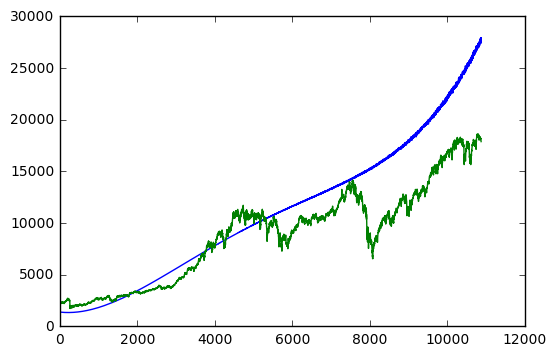

In [113]:
plt.plot(X,s(X))
plt.plot(X,Y)
plt.show()

In [100]:
MSE_list =[]
smoothing = np.linspace(1.0, 5.0, 1000)
for i in smoothing:
    s = UnivariateSpline(X,Y, k=i, s = 2)
    MSE_list.append(s.get_residual())


In [101]:
print MSE_list

[18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504, 18151809657.874504,

In [102]:
min_MSE = np.min(MSE_list)
index = MSE_list.index(min_MSE)

optimal_smoothing = smoothing[index]


In [110]:
s = UnivariateSpline(X,Y, k=optimal_smoothing)

In [111]:
print optimal_smoothing

4.003003003


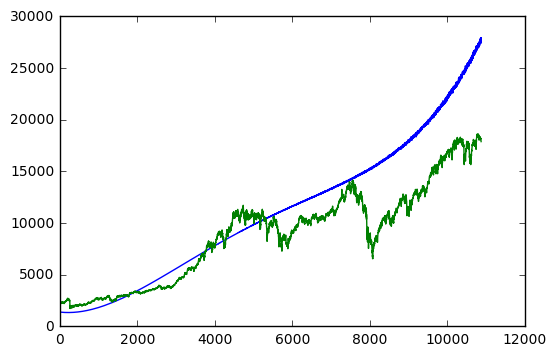

In [112]:
plt.plot(X,s(X))
plt.plot(X,Y)
plt.show()